In [ ]:
import pandas as pd
import numpy as np
import glob
from scipy.interpolate import interp1d
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models,optimizers,losses,metrics
from sklearn.model_selection import train_test_split,KFold,cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
csv=glob.glob("/content/*.csv")

In [ ]:
df=[]
for files in csv:
  tempdf=pd.read_csv(files)
  tempdf.columns=['1','2','3','4','5','6','7','8']
  df.append(tempdf)
comb_df=pd.concat(df)
comb_df.reset_index(drop=True, inplace=True)
comb_df

,1,2,3,4,5,6,7,8
0,80932,20107,207017,177101,0,0,0,0
1,80944,20101,207021,177049,0,0,0,0
2,80921,20023,207018,177059,0,0,0,0
3,80890,19976,207018,177117,0,0,0,0
4,80896,20011,207041,177162,0,0,0,0
...,...,...,...,...,...,...,...,...
415605,244420,78043,544689,415867,0,0,0,0
415606,243953,77773,544386,415731,0,0,0,0
415607,243383,77571,544100,415647,0,0,0,0
415608,243486,77710,544229,415732,0,0,0,0


In [ ]:
start_markers=["start zero.png","start one.png","start two.jpg","start three.jpg","start four.jpg","start five.jpg","start six.jpg","start seven.jpg","start eight.jpg","start nine.jpg","start animal.jpg"]
end_markers=["end zero.png","end one.png","end two.jpg","end three.jpg","end four.jpg","end five.jpg","end six.jpg","end seven.jpg","end eight.jpg","end nine.jpg","end animal.jpg"]

In [ ]:
s=np.zeros((18,11),dtype=int)
e=np.zeros((18,11),dtype=int)

In [ ]:
for j in range(11):
  fil=0
  for i in range(len(comb_df)):
      if(comb_df['1'].iloc[i]==start_markers[j]):
        s[fil][j]=i
        continue
      if(comb_df['1'].iloc[i]==end_markers[j]):
        e[fil][j]=i
        fil+=1
      if(fil==18):
        break

In [ ]:
s

array([[ 18960,  17167,   4353,  20840,   2431,  13579,  15373,   8069,
         11785,   9863,   6147],
       [ 31900,  27864,  36105,  26006,  24340,  40228,  36642,  43304,
         34462,  42150,  29978],
       [ 55217,  47494,  66877,  63161,  58933,  49451,  53423,  64955,
         60966,  51373,  57139],
       [ 75458,  83078,  71556,  77380,  81145,  86862,  73408,  79302,
         88656,  90578,  84921],
       [104029, 113383,  94139,  96085, 100185, 109667, 102107, 107745,
        105951, 111461,  98263],
       [116840, 129012, 134906, 136956, 122734, 124912, 118762, 120812,
        126962, 133112, 131062],
       [140797, 153739, 155533, 146307, 144385, 157455, 148101, 142591,
        149988, 159353, 151817],
       [169370, 174752, 167448, 171164, 163732, 176760, 180774, 161938,
        173086, 178724, 165618],
       [194353, 190065, 204268, 196275, 184231, 202297, 200119, 198197,
        192175, 186153, 188075],
       [221386, 215364, 225561, 211648, 207932, 223436,

In [ ]:
e

array([[ 20242,  18448,   5634,  22036,   3584,  14860,  16654,   9350,
         13066,  11144,   7428],
       [ 33181,  28569,  36385,  27671,  25365,  41509,  39715,  45481,
         35359,  43047,  31387],
       [ 56498,  48682,  68158,  64442,  60214,  50732,  54576,  66236,
         62136,  52654,  58420],
       [ 76739,  84299,  72767,  78661,  82377,  88143,  74689,  80583,
         89937,  91859,  86221],
       [105310, 114664,  95444,  97366, 101466, 110948, 103260, 109026,
        107104, 112742,  99288],
       [118121, 130293, 136187, 138237, 124015, 126193, 120043, 122093,
        128243, 134265, 132343],
       [142078, 155020, 156814, 147588, 145666, 158736, 149382, 143872,
        151176, 160658, 153098],
       [170651, 176033, 168729, 172445, 165013, 177955, 182055, 163091,
        174239, 179877, 166807],
       [195634, 191278, 205500, 197556, 185512, 203578, 201400, 199478,
        193456, 187434, 189356],
       [222667, 216645, 226767, 212929, 209213, 224845,

In [ ]:
def resample_array(array, target_length):
    slr=StandardScaler()
    input_indices = np.linspace(0, len(array)-1, len(array))
    resampled_indices =np.linspace(0,len(array)-1,target_length)
    interpolator =interp1d(input_indices,array,'linear')
    resampled_array =interpolator(resampled_indices)
    resampled_array=slr.fit_transform(resampled_array.reshape(-1,1)).flatten()
    return resampled_array

In [350]:
x_num = []
y_num = []
x_anim = []
y_anim = []

for i in range(10):
    for j in range(18):
        x_num.append(
            np.column_stack((resample_array(comb_df['1'].loc[(s[j][i]+1):(e[j][i]-1)].to_numpy().astype(int), 1200).flatten(),
            resample_array(comb_df['2'].loc[(s[j][i]+1):(e[j][i]-1)].to_numpy().astype(int), 1200).flatten(),
            resample_array(comb_df['3'].loc[(s[j][i]+1):(e[j][i]-1)].to_numpy().astype(int), 1200).flatten(),
            resample_array(comb_df['4'].loc[(s[j][i]+1):(e[j][i]-1)].to_numpy().astype(int), 1200).flatten()))
        )
        y_num.append(1)
for i in range(10,11):
    for j in range(18):
        x_anim.append(
            np.column_stack((resample_array(comb_df['1'].loc[(s[j][i]+1):(e[j][i]-1)].to_numpy().astype(int), 1200).flatten(),
            resample_array(comb_df['2'].loc[(s[j][i]+1):(e[j][i]-1)].to_numpy().astype(int), 1200).flatten(),
            resample_array(comb_df['3'].loc[(s[j][i]+1):(e[j][i]-1)].to_numpy().astype(int), 1200).flatten(),
            resample_array(comb_df['4'].loc[(s[j][i]+1):(e[j][i]-1)].to_numpy().astype(int), 1200).flatten()))
        )
        y_anim.append(0)
x_num = np.array(x_num)
y_num = np.array(y_num)
x_anim = np.array(x_anim)
y_anim = np.array(y_anim)

augmentation by averaging

In [ ]:
#average_x=[]
#for i in range(160):
  #indices=np.random.choice(18,3,replace=False)
  #average_x.append(np.mean(x_anim[indices],axis=0))
#average_x=np.array(average_x)
#average_y=np.zeros(160)

In [ ]:
#x_anim=np.concatenate((average_x,x_anim),axis=0)
#y_anim=np.concatenate((average_y,y_anim),axis=0)

augmentaion by recombining the time slices of original signals

In [351]:
ts_x=[]
slr=StandardScaler()
for i in range(160):
  indices=np.random.choice(18,3,replace=False)
  ts_x.append(np.concatenate((x_anim[indices[0]][:400],x_anim[indices[1]][400:800],x_anim[indices[2]][800:1200]),axis=0))
  ts_x[i]=slr.fit_transform(ts_x[i])
ts_x=np.array(ts_x)
ts_y=np.zeros(160)

In [352]:
ts_x.shape

(160, 1200, 4)

In [353]:
x_anim=np.concatenate((ts_x,x_anim),axis=0)
y_anim=np.concatenate((ts_y,y_anim),axis=0)

In [354]:
x=np.concatenate((x_num,x_anim),axis=0)
y=np.concatenate((y_num,y_anim),axis=0)

In [355]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [356]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1)

In [371]:
model=models.Sequential([
    layers.Conv1D(32,8,padding='same',activation='relu',strides=1,input_shape=(1200,4)),
    layers.AveragePooling1D(2,strides=2),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(2,activation='sigmoid')
])

In [372]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.98,
    staircase=True
)

In [382]:
model.compile(optimizer=optimizers.Adam(learning_rate=lr_schedule),loss=losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [383]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [384]:
train=model.fit(x_train,y_train,epochs=40,validation_data=(x_val,y_val),batch_size=40,callbacks=early_stopping)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8/8 [==============================] - 2s 84ms/step - loss: 3.1086 - accuracy: 0.6955 - val_loss: 1.8305 - val_accuracy: 0.6667
Epoch 2/40
8/8 [==============================] - 1s 82ms/step - loss: 2.6545 - accuracy: 0.7958 - val_loss: 0.6144 - val_accuracy: 0.8182
Epoch 3/40
8/8 [==============================] - 1s 86ms/step - loss: 1.0375 - accuracy: 0.8166 - val_loss: 0.5503 - val_accuracy: 0.8485
Epoch 4/40
8/8 [==============================] - 1s 79ms/step - loss: 0.6796 - accuracy: 0.8858 - val_loss: 0.4123 - val_accuracy: 0.7273
Epoch 5/40
8/8 [==============================] - 1s 78ms/step - loss: 0.3639 - accuracy: 0.8651 - val_loss: 0.3736 - val_accuracy: 0.7879
Epoch 6/40
8/8 [==============================] - 1s 88ms/step - loss: 0.3403 - accuracy: 0.9031 - val_loss: 0.3767 - val_accuracy: 0.7879
Epoch 7/40
8/8 [==============================] - 1s 74ms/step - loss: 0.2249 - accuracy: 0.8893 - val_loss: 0.4103 - val_accuracy: 0.8182
Epoch 8/40
8/8 [======================

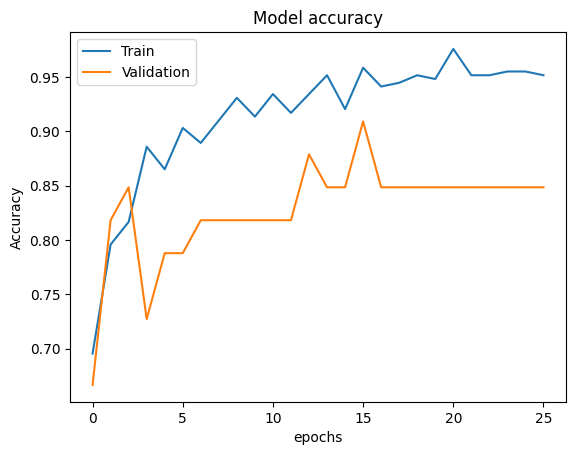

In [385]:
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [386]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.2447 - accuracy: 0.9444


[0.24473953247070312, 0.9444444179534912]

In [387]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
cm = confusion_matrix(y_test, y_pred)
cm

2/2 [==============================] - 0s 8ms/step


array([[19,  2],
       [ 0, 15]])

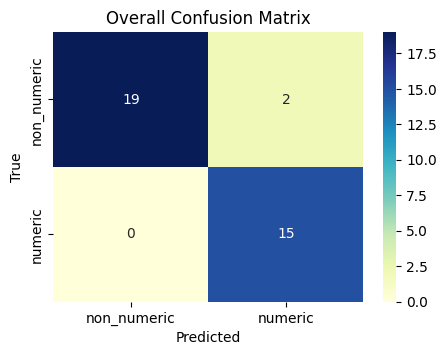

In [388]:
# Plot of overall confusion matrix
plt.figure(figsize=(5,3.5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['non_numeric', 'numeric'], yticklabels=['non_numeric', 'numeric'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Overall Confusion Matrix')
plt.show()

In [389]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

In [390]:
f1 = f1_score(y_test, y_pred)
f1

0.9375

In [391]:
recall= recall_score(y_test, y_pred)
recall

1.0

In [392]:
precision_score = precision_score(y_test, y_pred)
precision_score

0.8823529411764706

In [393]:
accuracy_score  = accuracy_score(y_test, y_pred)
accuracy_score

0.9444444444444444